In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
print(df.dtypes)

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [6]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [7]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [8]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [9]:
df_sydney_processed = df_sydney_processed.astype(float)

In [10]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

# **Linear Regression**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [12]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)
print(LinearReg.coef_, LinearReg.intercept_)

[-2.36907710e-02  1.29966571e-02  7.29548945e-04  6.49274945e-03
 -3.51640018e-02  4.23740089e-03  1.82884081e-03  7.90285431e-04
  9.55514270e-04  8.56154828e-03  7.69522778e-03 -9.24202072e-03
 -8.87676425e-03  1.00486013e-02  1.44593239e-02 -3.46720718e-03
  1.54184213e+10  1.54184213e+10  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08 -1.35217862e+08 -1.35217862e+08
 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08
 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08
 -1.35217862e+08 -1.35217

In [13]:
predictions = LinearReg.predict(x_test)
predictions[0:5]

array([0.13181305, 0.2762146 , 0.97820091, 0.28743744, 0.1324234 ])

In [14]:
train_x = np.asanyarray(x_train)
train_y = np.asanyarray(y_train)
LinearReg.fit(train_x, train_y)

print ('Coefficients: ', LinearReg.coef_)
print ('Intercept: ',LinearReg.intercept_)

Coefficients:  [-2.36907710e-02  1.29966571e-02  7.29548945e-04  6.49274945e-03
 -3.51640018e-02  4.23740089e-03  1.82884081e-03  7.90285431e-04
  9.55514270e-04  8.56154828e-03  7.69522778e-03 -9.24202072e-03
 -8.87676425e-03  1.00486013e-02  1.44593239e-02 -3.46720718e-03
  1.54184213e+10  1.54184213e+10  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  9.77340681e+08  9.77340681e+08
  9.77340681e+08  9.77340681e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08  5.70079436e+08  5.70079436e+08
  5.70079436e+08  5.70079436e+08 -1.35217862e+08 -1.35217862e+08
 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08
 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08 -1.35217862e+08
 -1.352178

In [15]:
test_x = np.asanyarray(x_test)
test_y = np.asanyarray(y_test)

test_y2 = LinearReg.predict(test_x)

In [16]:
test_y2[0:5]

array([0.13181305, 0.2762146 , 0.97820091, 0.28743744, 0.1324234 ])

In [17]:
from sklearn.metrics import r2_score

LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test)**2)
LinearRegression_R2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error {LinearRegression_MAE}\n Mean Squared Error: {LinearRegression_MSE}\n R squared Error: {LinearRegression_R2}")

Mean Absolute Error 0.25631593311105977
 Mean Squared Error: 0.11571951119153882
 R squared Error: 0.42713741243249836


In [18]:
results_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R squared Error'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

results_df

,Metric,Value
0,Mean Absolute Error,0.256316
1,Mean Squared Error,0.115720
2,R squared Error,0.427137


# **K Nearest Neighbour**

In [19]:
features_scaled = preprocessing.StandardScaler().fit(features).transform(features.astype(float))
train_x, test_x, train_y, test_y = train_test_split(features_scaled, Y, test_size=0.2, random_state=10)

In [20]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(train_x, train_y)
predictions_knn = KNN.predict(test_x)
predictions_knn[0:5]

array([0., 1., 1., 1., 0.])

In [21]:
KNN_Accuracy_Score = metrics.accuracy_score(test_y, predictions_knn)
KNN_JaccardIndex = metrics.jaccard_score(test_y, predictions_knn)
KNN_F1_Score = metrics.f1_score(test_y, predictions_knn)
print(KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score)

0.7603053435114504 0.24154589371980675 0.3891050583657587


In [22]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
predictions_knn = KNN.predict(x_test)
predictions_knn[0:5]

array([0., 0., 1., 0., 0.])

In [23]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions_knn)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions_knn)
KNN_F1_Score = metrics.f1_score(y_test, predictions_knn)
print(KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score)

0.8183206106870229 0.4251207729468599 0.5966101694915255


In [24]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# **Tree**

In [25]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x_train, y_train)
predictions_tree = tree.predict(x_test)
predictions_tree[0:5]

array([0., 0., 1., 0., 0.])

In [26]:
y_test[0:5]

3066    0.0
2456    0.0
1629    1.0
838     1.0
2506    0.0
Name: RainTomorrow, dtype: float64

In [27]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions_tree)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions_tree)
Tree_F1_Score = metrics.f1_score(y_test, predictions_tree)
print(Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score)

0.8183206106870229 0.48034934497816595 0.6489675516224188


# **Logistic Regression**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)


In [29]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [30]:
predictions_log = LR.predict(x_test)
predictions_proba = LR.predict_proba(x_test)


In [37]:
LR_Accuracy_Score = accuracy_score(y_test, predictions_log)
LR_JaccardIndex = jaccard_score(y_test, predictions_log)
LR_F1_Score = f1_score(y_test, predictions_log)
LR_Log_Loss = log_loss(y_test, predictions_proba)

In [38]:
print("Accuracy Score", LR_Accuracy_Score)
print("Jaccard Index", LR_JaccardIndex)
print("F1 Score", LR_F1_Score)
print("Log Loss", LR_Log_Loss)

Accuracy Score 0.8381679389312977
Jaccard Index 0.511520737327189
F1 Score 0.6768292682926829
Log Loss 0.38018471525232184


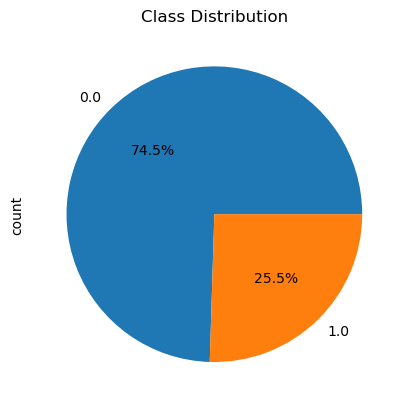

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Class Distribution')
plt.show()

In [40]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced')
LR.fit(x_train, y_train)
predictions_log = LR.predict(x_test)
predictions_proba = LR.predict_proba(x_test)
LR_Accuracy_Score = accuracy_score(y_test, predictions_log)
LR_JaccardIndex = jaccard_score(y_test, predictions_log)
LR_F1_Score = f1_score(y_test, predictions_log)
LR_Log_Loss = log_loss(y_test, predictions_proba)
print("Accuracy Score", LR_Accuracy_Score)
print("Jaccard Index", LR_JaccardIndex)
print("F1 Score", LR_F1_Score)
print("Log Loss", LR_Log_Loss)

Accuracy Score 0.7877862595419848
Jaccard Index 0.5070921985815603
F1 Score 0.6729411764705882
Log Loss 0.4493504453607028


In [49]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)
predictions_log = LR.predict(x_test)
predictions_proba = LR.predict_proba(x_test)
LR_Accuracy_Score = accuracy_score(y_test, predictions_log)
LR_JaccardIndex = jaccard_score(y_test, predictions_log, average='weighted')
LR_F1_Score = f1_score(y_test, predictions_log, average='weighted')
LR_Log_Loss = log_loss(y_test, predictions_proba)
print("Accuracy Score", LR_Accuracy_Score)
print("Jaccard Index", LR_JaccardIndex)
print("F1 Score", LR_F1_Score)
print("Log Loss", LR_Log_Loss)

Accuracy Score 0.8381679389312977
Jaccard Index 0.7235592870489738
F1 Score 0.8322532829812059
Log Loss 0.38018471525232184


# **Support Vector Machine**(***SVM***)

In [41]:
SVM = svm.SVC()

In [42]:
SVM.fit(x_train, y_train)
predictions_svm = SVM.predict(x_test)


In [43]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions_svm)
SVM_JaccardIndex = jaccard_score(y_test, predictions_svm)
SVM_F1_Score = f1_score(y_test, predictions_svm)

In [44]:
print("Accuracy Score", SVM_Accuracy_Score)
print("Jaccard Index", SVM_JaccardIndex)
print("F1 Score", SVM_F1_Score)

Accuracy Score 0.7221374045801526
Jaccard Index 0.0
F1 Score 0.0


In [45]:
print(y_test[0:10])

255     0.0
1552    0.0
1353    0.0
1060    0.0
808     0.0
836     1.0
2108    0.0
3005    0.0
1401    0.0
602     0.0
Name: RainTomorrow, dtype: float64


In [46]:
print(predictions_svm[0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
